# Pick a few targets and plot them

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
# path to the data
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()
# load all score
df = pd.read_csv(score_dir / 'all_score.csv.gz', index_col=0)
result_each_target = pd.read_csv(score_dir / 'mqa_result_each_target_gdtts_5.csv', index_col=0)
result_each_target_ptm = pd.read_csv(score_dir / 'mqa_result_each_target_gdtts_5_with_ptm.csv', index_col=0)
display(df)

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
112595       model_5_seed_1_rec_7_ens_8    0.977   0.965   0.865        0.888   
112596       model_5_seed_1_rec_8_ens_1    0.980   0.964   0.861        0.894   
112597       model_5_seed_1_rec_8_ens_8    0.977   0.965   0.866        0.887   
112598       model_5_seed_1_rec_9_ens_1    0.980   0.964   0.861        0.894   
112599       model_5_seed_1_rec_9_ens_8    0.977   0.966   0.862        0.889   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
0           0.901  0.955     0.900      0.032  model_1_ptm  ... 123028.594   
1           0.901  0.956     0.901      0.019  model_1_ptm  ... 123495.156   
2           0.901  0.944     0.895     20.749  model_1_ptm  ... 120974.703   
3           0.901  0.947     0.896     20.749  model_1_ptm  ... 120961.469   
4           0.903  0.948     0.897      0.172  model_1_ptm  ... 121001.195   
...           ...    ...       ...        ...          ...  ...        ...   
112595      0.885  0.920       NaN      0.045      model_5  ... 101688.102   
112596      0.890  0.922       NaN      0.032      model_5  ... 103715.461   
112597      0.884  0.920       NaN      0.089      model_5  ... 102201.047   
112598      0.890  0.922       NaN      0.031      model_5  ... 103479.828   
112599      0.885  0.921       NaN      0.043      model_5  ... 101200.562   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0            0.994            0.891  0.973   0.821        0.806       0.967   
1            0.995            0.955  0.972   0.823        0.805       0.966   
2            0.990            0.894  0.977   0.822        0.803       0.961   
3            0.993            0.878  0.977   0.828        0.805       0.966   
4            0.989            0.866  0.973   0.816        0.793       0.963   
...            ...              ...    ...     ...          ...         ...   
112595       0.882            0.897  0.496   0.474        0.514       0.852   
112596       0.878            0.835  0.483   0.439        0.443       0.838   
112597       0.886            0.899  0.489   0.457        0.478       0.844   
112598       0.890            0.853  0.493   0.468        0.473       0.849   
112599       0.887            0.898  0.481   0.458        0.466       0.843   

       ProQ3D  SBROD VoroCNN  
0       0.895  1.505   0.686  
1       0.894  1.507   0.687  
2       0.891  1.515   0.687  
3       0.892  1.514   0.684  
4       0.888  1.513   0.679  
...       ...    ...     ...  
112595  0.782  1.369   0.631  
112596  0.775  1.370   0.630  
112597  0.779  1.367   0.630  
112598  0.784  1.367   0.632  
112599  0.780  1.365   0.632  

[112600 rows x 37 columns]

## Targets with low relationships between GDT_TS and pLDDT

### GDT_TS loss

In [2]:
method = 'pLDDT'
label = 'GDT_TS'
metric = 'Loss'
label_metric = f'{label} {metric}'
low_gdtts_loss_df = result_each_target.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_gdtts_loss_df

Target  GDT_TS Loss
878  7BER_A        0.000
778  6XM2_I        0.000
538  6P58_A        0.000
388  6JU8_A        0.000
308  6I1M_A        0.000
..      ...          ...
618  6SP9_A       11.930
568  6RO0_B       12.310
748  6WVH_A       12.630
708  6UWA_A       14.170
58   5Y24_A       17.630

[101 rows x 2 columns]

In [3]:
target_num = 10
display(low_gdtts_loss_df.tail(target_num).reset_index(drop=True))
sample_targets = low_gdtts_loss_df[-target_num:]['Target'].to_list()

Target  GDT_TS Loss
0  6Z4U_A        8.030
1  7LKN_A        8.680
2  6NES_A        9.800
3  6I6H_A       11.590
4  7N50_A       11.820
5  6SP9_A       11.930
6  6RO0_B       12.310
7  6WVH_A       12.630
8  6UWA_A       14.170
9  5Y24_A       17.630

Target                           Model GDT_TS pLDDT    legend
0  5Y24_A     model_5_seed_1_rec_10_ens_1  0.977 0.941      best
1  5Y24_A  model_3_ptm_seed_0_rec_2_ens_1  0.801 0.944  selected

Target                        Model GDT_TS pLDDT    legend
0  6I6H_A  model_5_seed_1_rec_10_ens_1  0.988 0.916      best
1  6I6H_A  model_2_seed_0_rec_10_ens_1  0.872 0.941  selected

Target                            Model GDT_TS pLDDT    legend
0  6NES_A  model_2_ptm_seed_0_rec_10_ens_1  0.957 0.925      best
1  6NES_A   model_4_ptm_seed_0_rec_4_ens_1  0.859 0.937  selected

Target                           Model GDT_TS pLDDT    legend
0  6RO0_B  model_5_ptm_seed_0_rec_5_ens_1  0.712 0.741      best
1  6RO0_B  model_3_ptm_seed_1_rec_6_ens_1  0.589 0.787  selected

Target                           Model GDT_TS pLDDT    legend
0  6SP9_A  model_3_ptm_seed_1_rec_3_ens_8  0.914 0.888      best
1  6SP9_A      model_1_seed_1_rec_1_ens_1  0.794 0.905  selected

Target                           Model GDT_TS pLDDT    legend
0  6UWA_A  model_5_ptm_seed_1_rec_2_ens_1  0.881 0.916      best
1  6UWA_A      model_5_seed_0_rec_9_ens_1  0.739 0.938  selected

Target                        Model GDT_TS pLDDT    legend
0  6WVH_A   model_4_seed_1_rec_1_ens_1  0.799 0.907      best
1  6WVH_A  model_3_seed_0_rec_10_ens_1  0.673 0.929  selected

Target                           Model GDT_TS pLDDT    legend
0  6Z4U_A     model_2_seed_1_rec_10_ens_8  0.259 0.334      best
1  6Z4U_A  model_2_ptm_seed_0_rec_9_ens_1  0.179 0.492  selected

Target                            Model GDT_TS pLDDT    legend
0  7LKN_A  model_3_ptm_seed_1_rec_10_ens_1  0.964 0.844      best
1  7LKN_A      model_1_seed_1_rec_10_ens_1  0.877 0.882  selected

Target                           Model GDT_TS pLDDT    legend
0  7N50_A  model_1_ptm_seed_1_rec_6_ens_8  0.712 0.746      best
1  7N50_A  model_2_ptm_seed_0_rec_4_ens_8  0.594 0.774  selected

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
4800    model_1_ptm_seed_0_rec_10_ens_1    0.939   0.819   0.652        0.852   
4801    model_1_ptm_seed_0_rec_10_ens_8    0.941   0.824   0.657        0.851   
4802     model_1_ptm_seed_0_rec_1_ens_1    0.948   0.846   0.677        0.854   
4803     model_1_ptm_seed_0_rec_1_ens_8    0.943   0.826   0.657        0.854   
4804     model_1_ptm_seed_0_rec_2_ens_1    0.942   0.825   0.656        0.855   
...                                 ...      ...     ...     ...          ...   
108195       model_5_seed_1_rec_7_ens_8    0.903   0.847   0.675          NaN   
108196       model_5_seed_1_rec_8_ens_1    0.903   0.847   0.682          NaN   
108197       model_5_seed_1_rec_8_ens_8    0.903   0.846   0.674          NaN   
108198       model_5_seed_1_rec_9_ens_1    0.905   0.851   0.684          NaN   
108199       model_5_seed_1_rec_9_ens_8    0.903   0.847   0.675          NaN   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  \
4800        0.839  0.879     0.875      0.249  model_1_ptm  ...   
4801        0.838  0.878     0.877      0.110  model_1_ptm  ...   
4802        0.841  0.874     0.876     30.805  model_1_ptm  ...   
4803        0.841  0.873     0.877     30.693  model_1_ptm  ...   
4804        0.842  0.874     0.874      0.418  model_1_ptm  ...   
...           ...    ...       ...        ...          ...  ...   
108195        NaN  0.853       NaN      0.342      model_5  ...   
108196        NaN  0.860       NaN      0.631      model_5  ...   
108197        NaN  0.851       NaN      0.418      model_5  ...   
108198        NaN  0.853       NaN      0.777      model_5  ...   
108199        NaN  0.853       NaN      0.358      model_5  ...   

        DeepAccNet-Bert  P3CMQA  ProQ2D ProQRosCenD  ProQRosFAD  ProQ3D  \
4800              0.978   0.934   0.783       0.806       0.937   0.873   
4801              0.975   0.933   0.764       0.793       0.935   0.866   
4802              0.985   0.935   0.795       0.819       0.942   0.878   
4803              0.979   0.936   0.790       0.815       0.943   0.880   
4804              0.981   0.935   0.779       0.802       0.939   0.871   
...                 ...     ...     ...         ...         ...     ...   
108195            0.826   0.822   0.581       0.478       0.809   0.638   
108196            0.823   0.829   0.603       0.497       0.815   0.647   
108197            0.818   0.827   0.590       0.474       0.810   0.643   
108198            0.809   0.827   0.601       0.489       0.809   0.647   
108199            0.810   0.826   0.599       0.478       0.815   0.657   

        SBROD VoroCNN    Loss size  
4800    1.759   0.688  others    5  
4801    1.766   0.688  others    5  
4802    1.764   0.690  others    5  
4803    1.766   0.693  others    5  
4804    1.772   0.686  others    5  
...       ...     ...     ...  ...  
108195  1.544   0.668  others    5  
108196  1.550   0.663  others    5  
108197  1.551   0.666  others    5  
108198  1.552   0.672  others    5  
108199  1.550   0.664  others    5  

[3800 rows x 39 columns]

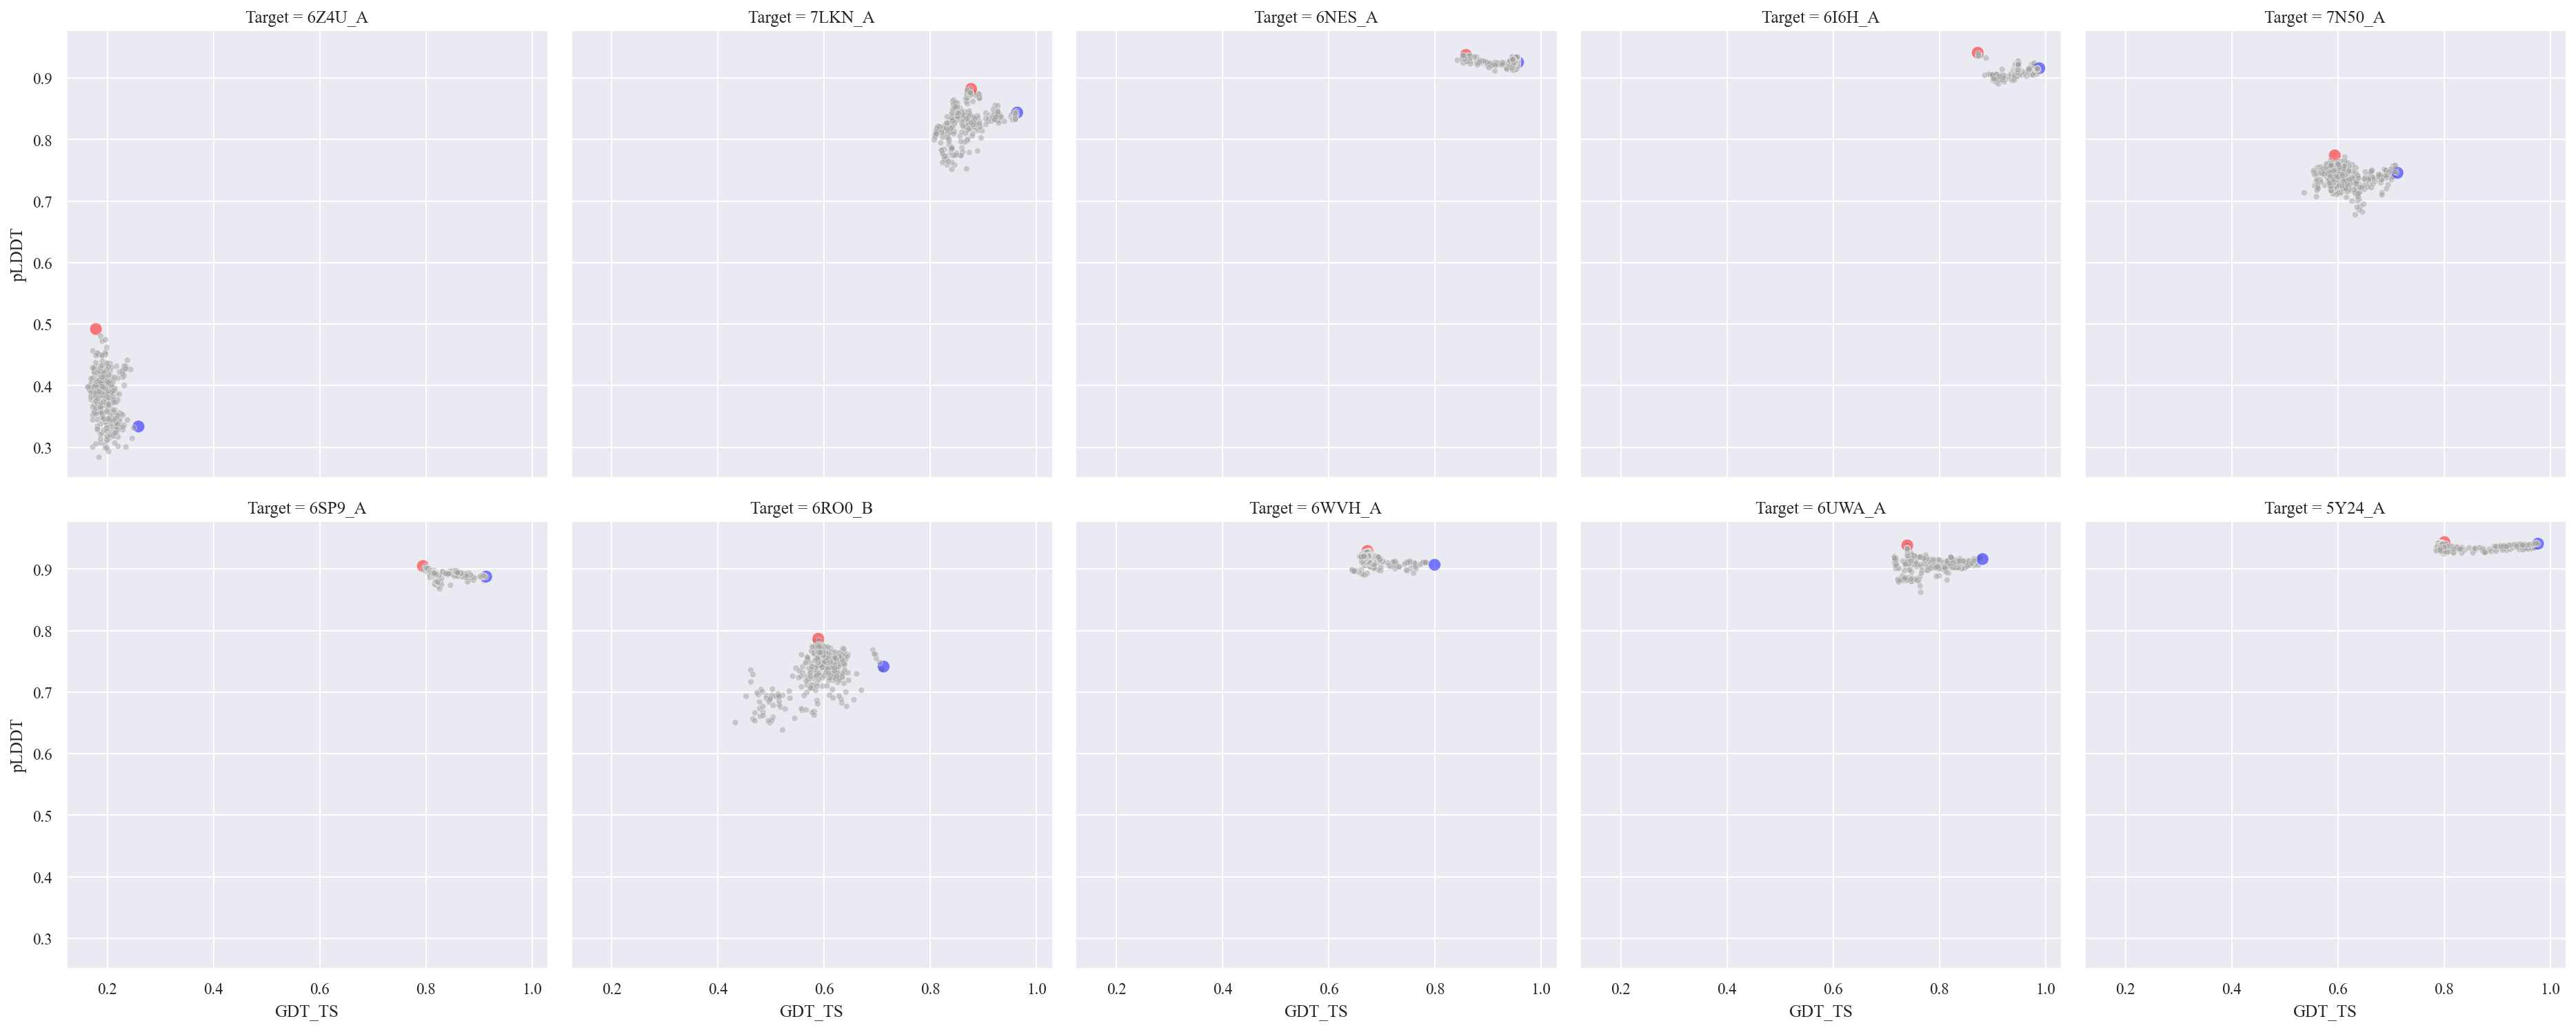

In [4]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
def add_legend(group, label, method, legend='Loss'):
    best_idx = group[label].idxmax()
    selected_idx = group[method].idxmax()
    best_row = group.loc[best_idx]
    selected_row = group.loc[selected_idx]
    columns = ['Target', 'Model', label, method, 'legend']
    best_row['legend'] = 'best'
    selected_row['legend'] = 'selected'
    display(pd.concat([best_row[columns].to_frame().T, selected_row[columns].to_frame().T]).reset_index(drop=True))
    group[legend] = 'others'
    group[legend][best_idx] = 'best'
    group[legend][selected_idx] = 'selected'
    size = 5
    group['size'] = size
    size_focus = size * 5
    group['size'][best_idx] = size_focus
    group['size'][selected_idx] = size_focus
    return group

label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, col_order=sample_targets,
            palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
g.legend.remove()

Target                           Model GDT_TS pLDDT    legend
0  5Y24_A     model_5_seed_1_rec_10_ens_1  0.977 0.941      best
1  5Y24_A  model_3_ptm_seed_0_rec_2_ens_1  0.801 0.944  selected

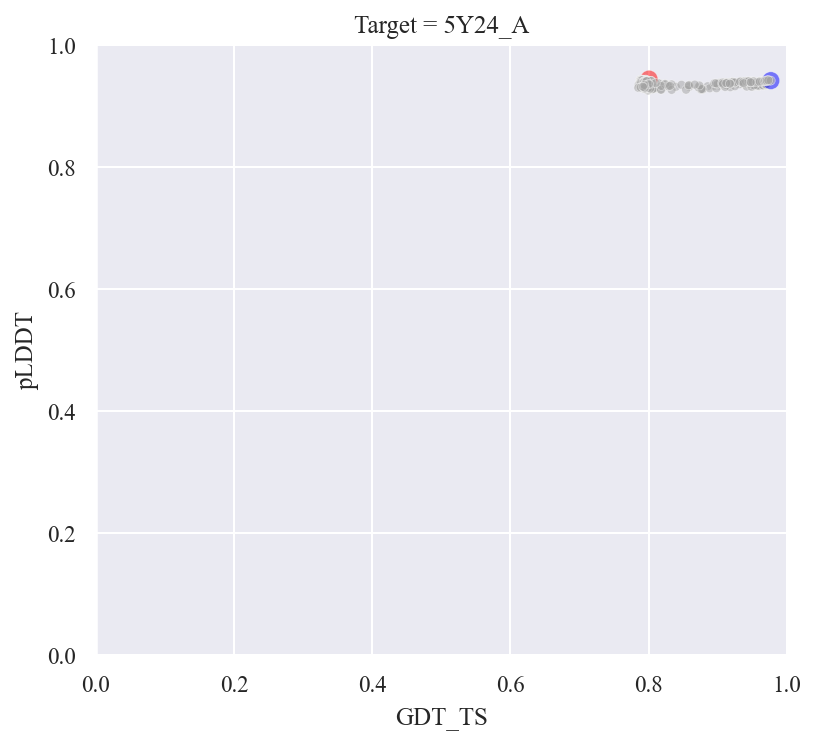

In [5]:
# Target which is the worst loss
sample_target = sample_targets[-1]
data = df.groupby('Target').filter(lambda x: x.name in sample_target)
label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
g.legend.remove()

Target                           Model GDT_TS pLDDT    legend
0  6UWA_A  model_5_ptm_seed_1_rec_2_ens_1  0.881 0.916      best
1  6UWA_A      model_5_seed_0_rec_9_ens_1  0.739 0.938  selected

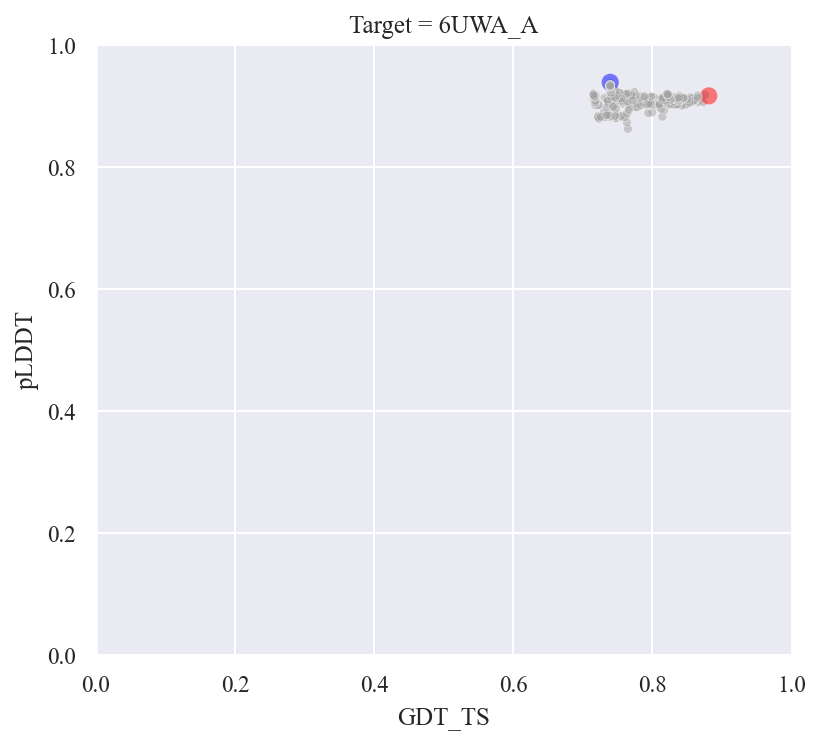

In [6]:
# Target which is the 2nd worst loss
sample_target = sample_targets[-2]
data = df.groupby('Target').filter(lambda x: x.name in sample_target)
label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
g.legend.remove()

### Pearson

In [7]:
# Pearson
method = 'pLDDT'
label = 'GDT_TS'
metric = 'Pearson'
label_metric = f'{label} {metric}'
low_corr_df = result_each_target.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_corr_df

Target  GDT_TS Pearson
908  7COH_O          -0.630
128  6CZQ_B          -0.594
468  6LTF_A          -0.505
88   5ZOE_A          -0.459
958  7KIH_A          -0.444
..      ...             ...
288  6H7B_A           0.871
688  6TNJ_A           0.904
268  6H24_A           0.915
208  6EXU_A           0.930
28   5VTL_A           0.981

[101 rows x 2 columns]

In [8]:
target_num = 10
display(low_corr_df.head(target_num).reset_index(drop=True))
sample_targets = low_corr_df.head(target_num)['Target'].to_list()
sample_targets

Target  GDT_TS Pearson
0  7COH_O          -0.630
1  6CZQ_B          -0.594
2  6LTF_A          -0.505
3  5ZOE_A          -0.459
4  7KIH_A          -0.444
5  6CFV_A          -0.414
6  7JOO_C          -0.378
7  7LCZ_A          -0.335
8  6H6Y_A          -0.287
9  6Z4U_A          -0.265

['7COH_O',
 '6CZQ_B',
 '6LTF_A',
 '5ZOE_A',
 '7KIH_A',
 '6CFV_A',
 '7JOO_C',
 '7LCZ_A',
 '6H6Y_A',
 '6Z4U_A']

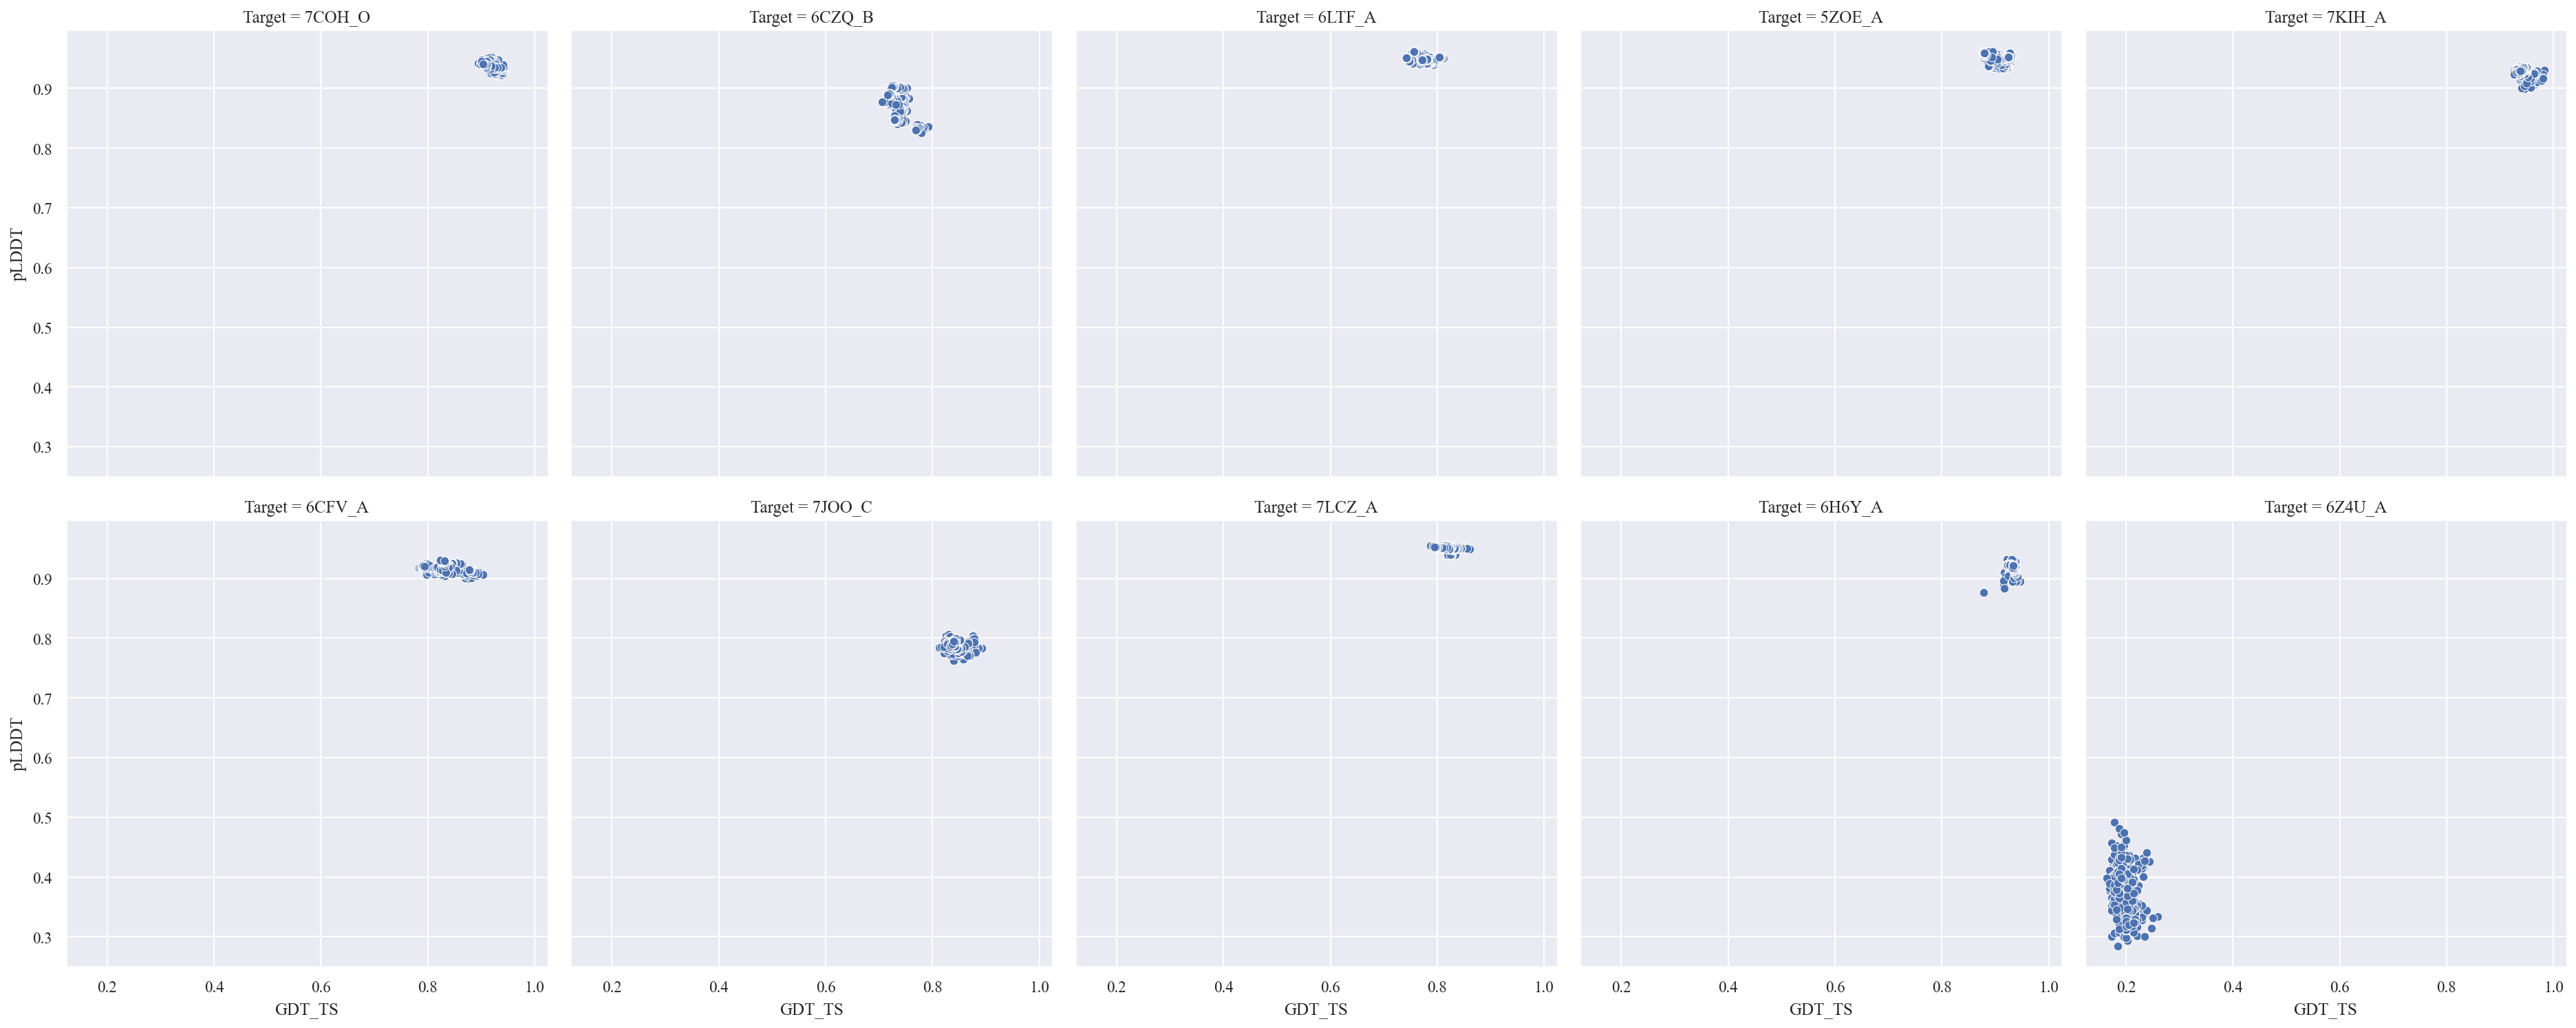

In [9]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets)

## Target with low relationship between GDT_TS and pTMscore

### Target with Low GDT_TS loss

In [10]:
method = 'pTMscore'
label = 'GDT_TS'
metric = 'Loss'
label_metric = f'{label} {metric}'
low_gdtts_loss_df_ptm = result_each_target_ptm.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_gdtts_loss_df_ptm

Target  GDT_TS Loss
369  6LCH_A        0.000
269  6I1M_A        0.000
629  6TJB_B        0.000
489  6P58_A        0.000
769  6Y24_A        0.000
..      ...          ...
699  6WVH_A       11.580
939  7N50_A       11.820
519  6RO0_B       12.310
659  6UWA_A       13.500
59   5Y24_A       17.040

[94 rows x 2 columns]

In [11]:
target_num = 2
display(low_gdtts_loss_df_ptm.tail(target_num).reset_index(drop=True))
sample_targets = low_gdtts_loss_df_ptm[-target_num:]['Target'].to_list()

Target  GDT_TS Loss
0  6UWA_A       13.500
1  5Y24_A       17.040

Target                            Model GDT_TS pTMscore    legend
0  5Y24_A  model_4_ptm_seed_1_rec_10_ens_8  0.971    0.895      best
1  5Y24_A   model_3_ptm_seed_0_rec_2_ens_1  0.801    0.905  selected

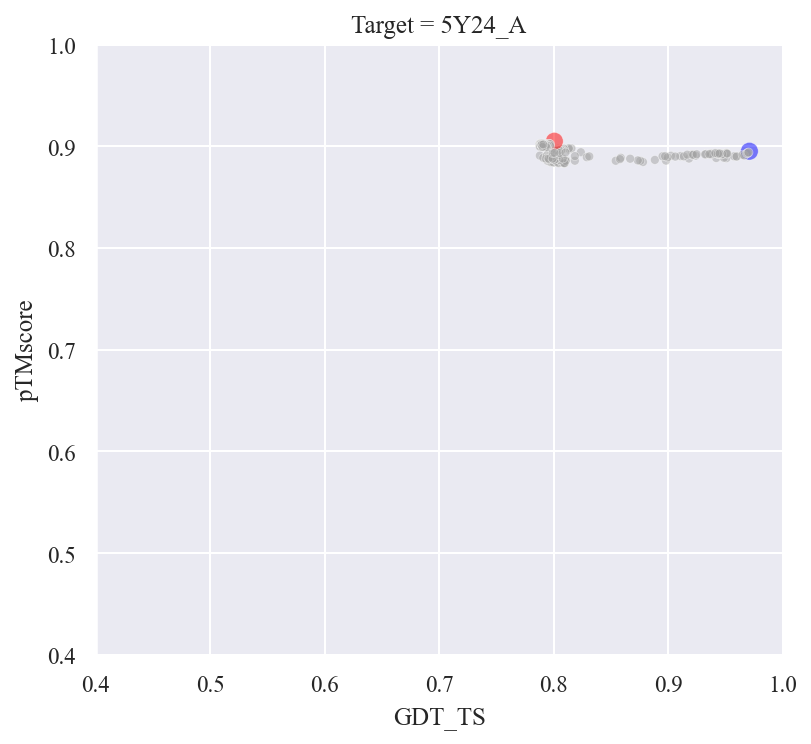

In [12]:
# Target which is the worst loss
label = 'GDT_TS'
method = 'pTMscore'
sample_target = sample_targets[-1]
data = df[~df[method].isna()].groupby('Target').filter(lambda x: x.name in sample_target)
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0.4, 1)
plt.ylim(0.4, 1)
g.legend.remove()

Target                            Model GDT_TS pTMscore    legend
0  6UWA_A   model_5_ptm_seed_1_rec_2_ens_1  0.881    0.775      best
1  6UWA_A  model_5_ptm_seed_1_rec_10_ens_8  0.746    0.786  selected

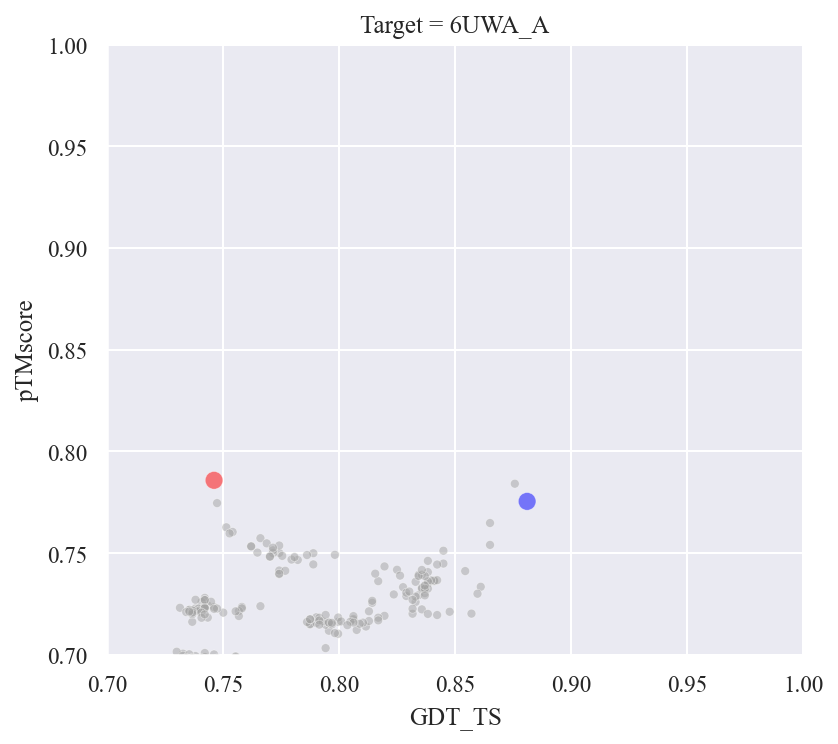

In [13]:
# Target which is the worst loss
label = 'GDT_TS'
method = 'pTMscore'
sample_target = sample_targets[-2]
data = df[~df[method].isna()].groupby('Target').filter(lambda x: x.name in sample_target)
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0.7, 1)
plt.ylim(0.7, 1)
g.legend.remove()

### Targets with low correlation between pTMscore and GDT_TS

In [14]:
# Pearson
method = 'pTMscore'
label = 'GDT_TS'
metric = 'Pearson'
label_metric = f'{label} {metric}'
low_corr_df_ptm = result_each_target_ptm.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_corr_df_ptm

Target  GDT_TS Pearson
119  6CZQ_B          -0.814
289  6ILS_A          -0.722
79   5ZOE_A          -0.669
109  6CFV_A          -0.667
849  7COH_O          -0.636
..      ...             ...
129  6D85_B           0.918
49   5XP0_A           0.938
239  6H24_A           0.942
189  6EXU_A           0.964
29   5VTL_A           0.977

[94 rows x 2 columns]

In [15]:
target_num = 10
display(low_corr_df_ptm.head(target_num).reset_index(drop=True))
sample_targets = low_corr_df_ptm.head(target_num)['Target'].to_list()
sample_targets

Target  GDT_TS Pearson
0  6CZQ_B          -0.814
1  6ILS_A          -0.722
2  5ZOE_A          -0.669
3  6CFV_A          -0.667
4  7COH_O          -0.636
5  6W40_A          -0.592
6  6G2V_A          -0.567
7  6NES_A          -0.504
8  6WJA_A          -0.472
9  7KIH_A          -0.421

['6CZQ_B',
 '6ILS_A',
 '5ZOE_A',
 '6CFV_A',
 '7COH_O',
 '6W40_A',
 '6G2V_A',
 '6NES_A',
 '6WJA_A',
 '7KIH_A']

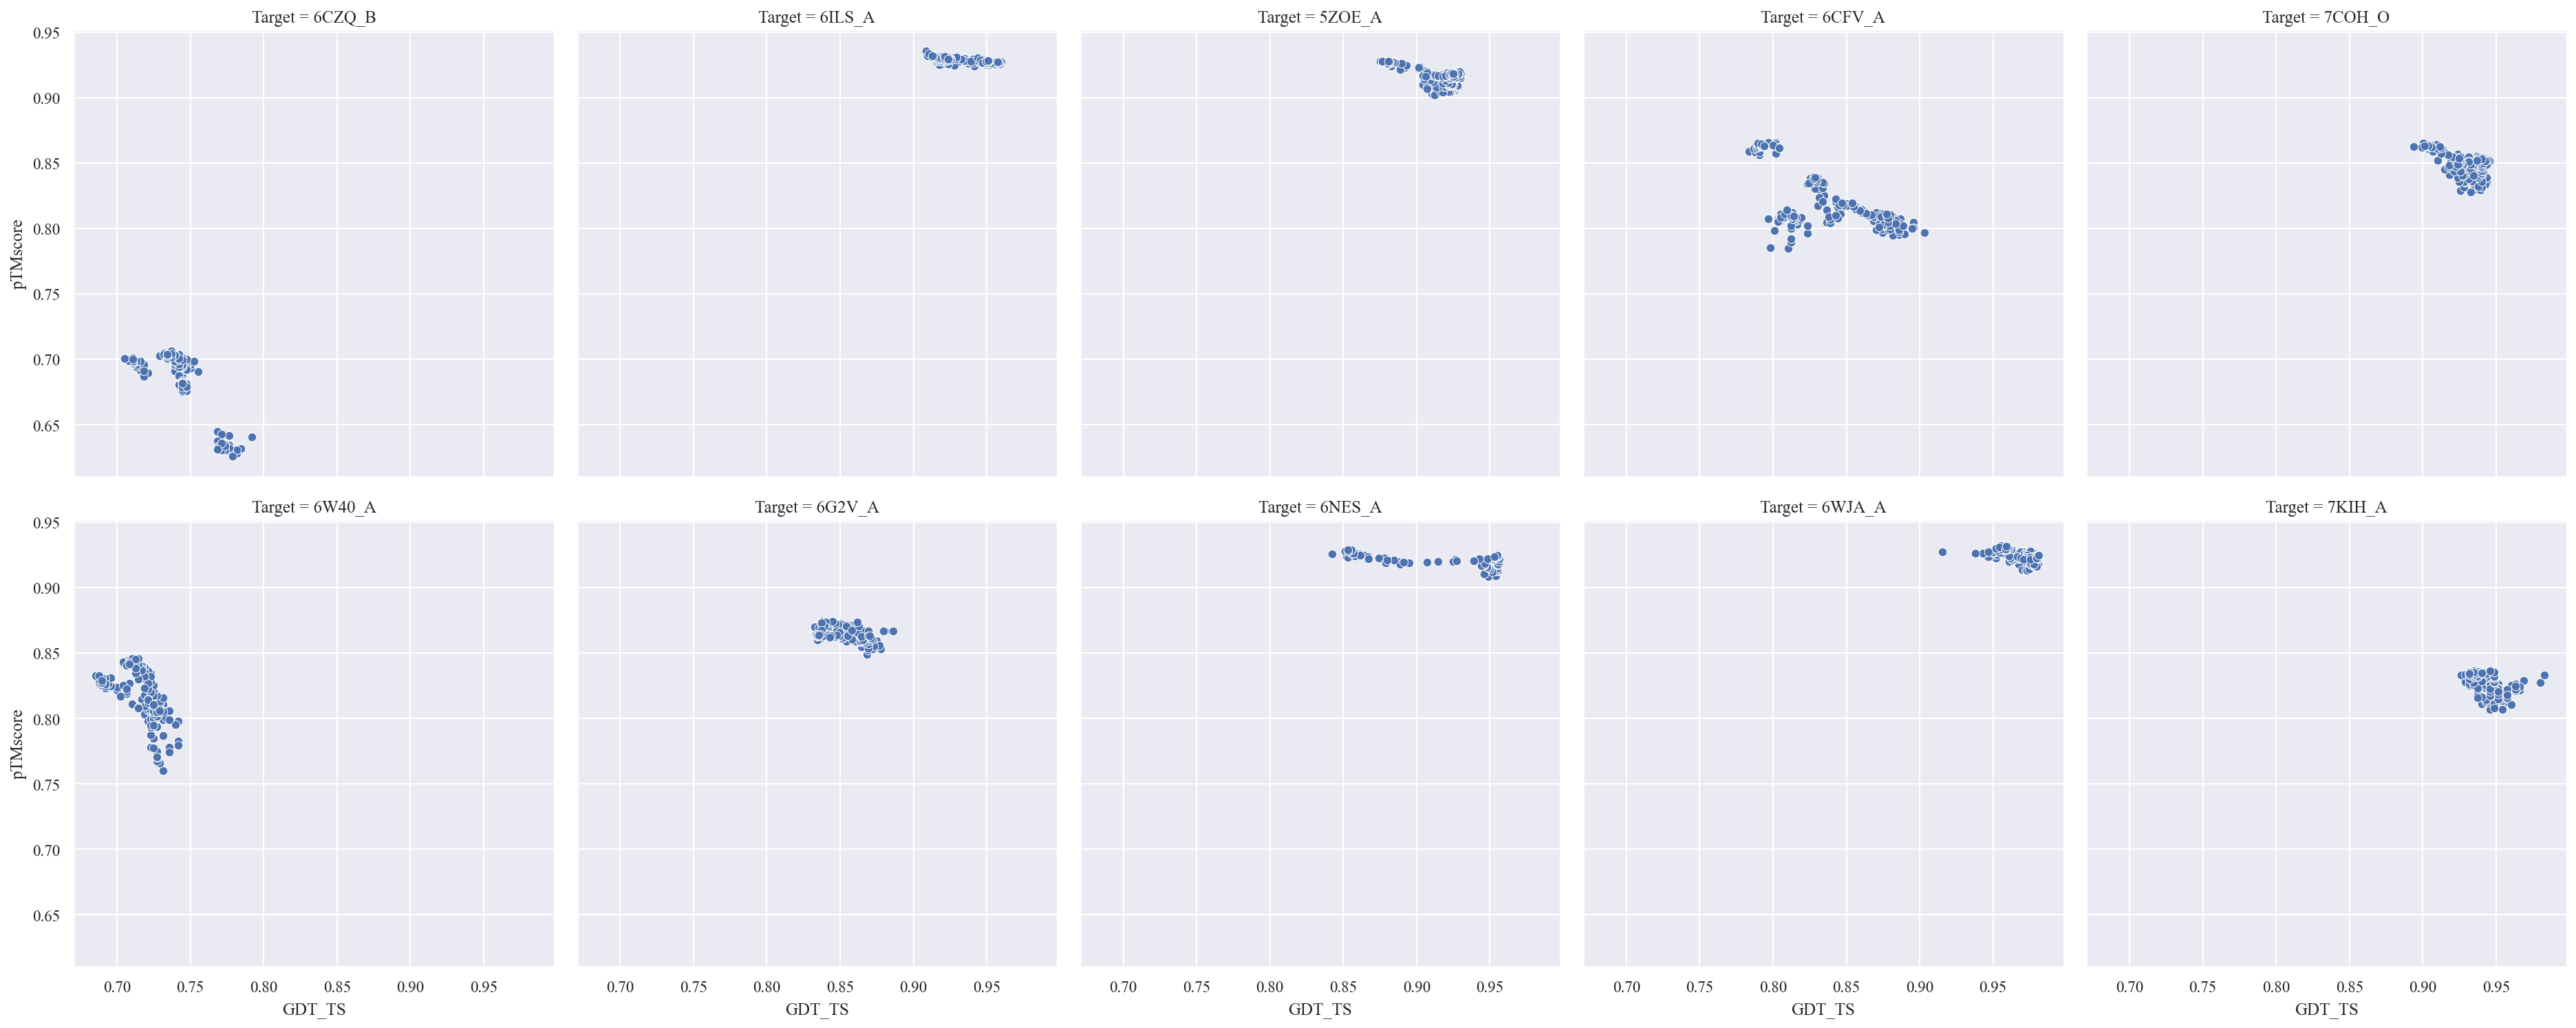

In [16]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pTMscore'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets)

## Targets with low GDT_TS

In [17]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets = gdtts_max_df.head(target_num).index.to_list()

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
Target                                                                          
6Z4U_A      model_2_seed_1_rec_10_ens_8    0.243   0.259   0.146        0.304   
7EL1_E       model_3_seed_0_rec_2_ens_8    0.487   0.474   0.347        0.415   
6NNW_A  model_2_ptm_seed_1_rec_10_ens_1    0.760   0.695   0.538        0.654   
6RO0_B   model_5_ptm_seed_0_rec_5_ens_1    0.823   0.712   0.506        0.773   
7N50_A   model_1_ptm_seed_1_rec_6_ens_8    0.828   0.712   0.503          NaN   
6W40_A   model_3_ptm_seed_0_rec_2_ens_8    0.748   0.742   0.575        0.648   
6JFK_A       model_2_seed_0_rec_9_ens_1    0.860   0.771   0.627        0.778   
5Z49_B       model_2_seed_0_rec_3_ens_1    0.896   0.785   0.608        0.815   
6CZQ_B   model_5_ptm_seed_0_rec_1_ens_1    0.776   0.792   0.676        0.714   
6WVH_A       model_4_seed_1_rec_1_ens_1    0.924   0.799   0.685        0.904   
7D5Y_A   model_5_ptm_seed_1_rec_3_ens_1    0.834   0.801   0.706        0.767   
6LK7_A   model_3_ptm_seed_1_rec_1_ens_1    0.765   0.804   0.628        0.732   
6LTF_A   model_5_ptm_seed_1_rec_1_ens_8    0.935   0.811   0.647        0.896   
6S2W_B       model_1_seed_0_rec_1_ens_8    0.801   0.814   0.646        0.756   
6XM2_I       model_2_seed_0_rec_1_ens_1    0.815   0.815   0.688        0.749   
6S62_A   model_5_ptm_seed_1_rec_1_ens_1    0.912   0.826   0.703        0.911   
6GUS_A  model_5_ptm_seed_0_rec_10_ens_8    0.853   0.832   0.721        0.763   
5YI6_A  model_3_ptm_seed_0_rec_10_ens_8    0.911   0.836   0.701        0.806   
6X6B_A       model_5_seed_0_rec_9_ens_1    0.930   0.842   0.677        0.870   
7CM1_B   model_4_ptm_seed_1_rec_2_ens_1    0.932   0.850   0.687        0.774   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
Target                                                      ...              
6Z4U_A      0.324  0.334       NaN      2.304      model_2  ...   9671.399   
7EL1_E      0.415  0.455       NaN      4.775      model_3  ...  30018.494   
6NNW_A      0.644  0.739     0.665      0.204  model_2_ptm  ... 145571.453   
6RO0_B      0.766  0.741     0.639      1.480  model_5_ptm  ... 144835.844   
7N50_A        NaN  0.746     0.755      0.293  model_1_ptm  ... 181624.281   
6W40_A      0.652  0.884     0.783      0.242  model_3_ptm  ... 105422.445   
6JFK_A      0.753  0.881       NaN      0.114      model_2  ... 210728.250   
5Z49_B      0.807  0.869       NaN      0.359      model_2  ... 155151.047   
6CZQ_B      0.695  0.836     0.640     29.973  model_5_ptm  ...  12221.789   
6WVH_A      0.898  0.907       NaN     39.061      model_4  ... 343040.875   
7D5Y_A      0.748  0.935     0.918      0.145  model_5_ptm  ... 155501.969   
6LK7_A      0.711  0.746     0.531     20.208  model_3_ptm  ...  13973.975   
6LTF_A      0.891  0.950     0.924     28.150  model_5_ptm  ... 221501.500   
6S2W_B      0.728  0.860       NaN     23.569      model_1  ...  57610.070   
6XM2_I      0.749  0.842       NaN     26.529      model_2  ...  62409.836   
6S62_A      0.910  0.960     0.936     32.587  model_5_ptm  ... 262101.312   
6GUS_A      0.744  0.877     0.775      0.022  model_5_ptm  ... 119684.078   
5YI6_A      0.800  0.900     0.859      0.107  model_3_ptm  ... 207036.203   
6X6B_A      0.870  0.871       NaN      1.032      model_5  ... 183872.125   
7CM1_B      0.753  0.822     0.865      1.699  model_4_ptm  ... 282198.938   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
Target                                                                        
6Z4U_A       0.386            0.337  0.048   0.066        0.154       0.135   
7EL1_E       0.537            0.527  0.180   0.211        0.304       0.302   
6NNW_A       0.716            0.727  0.219   0.432        0.556       0.780   
6RO0_B       0.845            0.910  0.710   0.329        0.377       0.761   
7N50_A       0.789            0.736  0.501   0.380        0.

In [18]:
df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

In [19]:
gdtts_max_df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

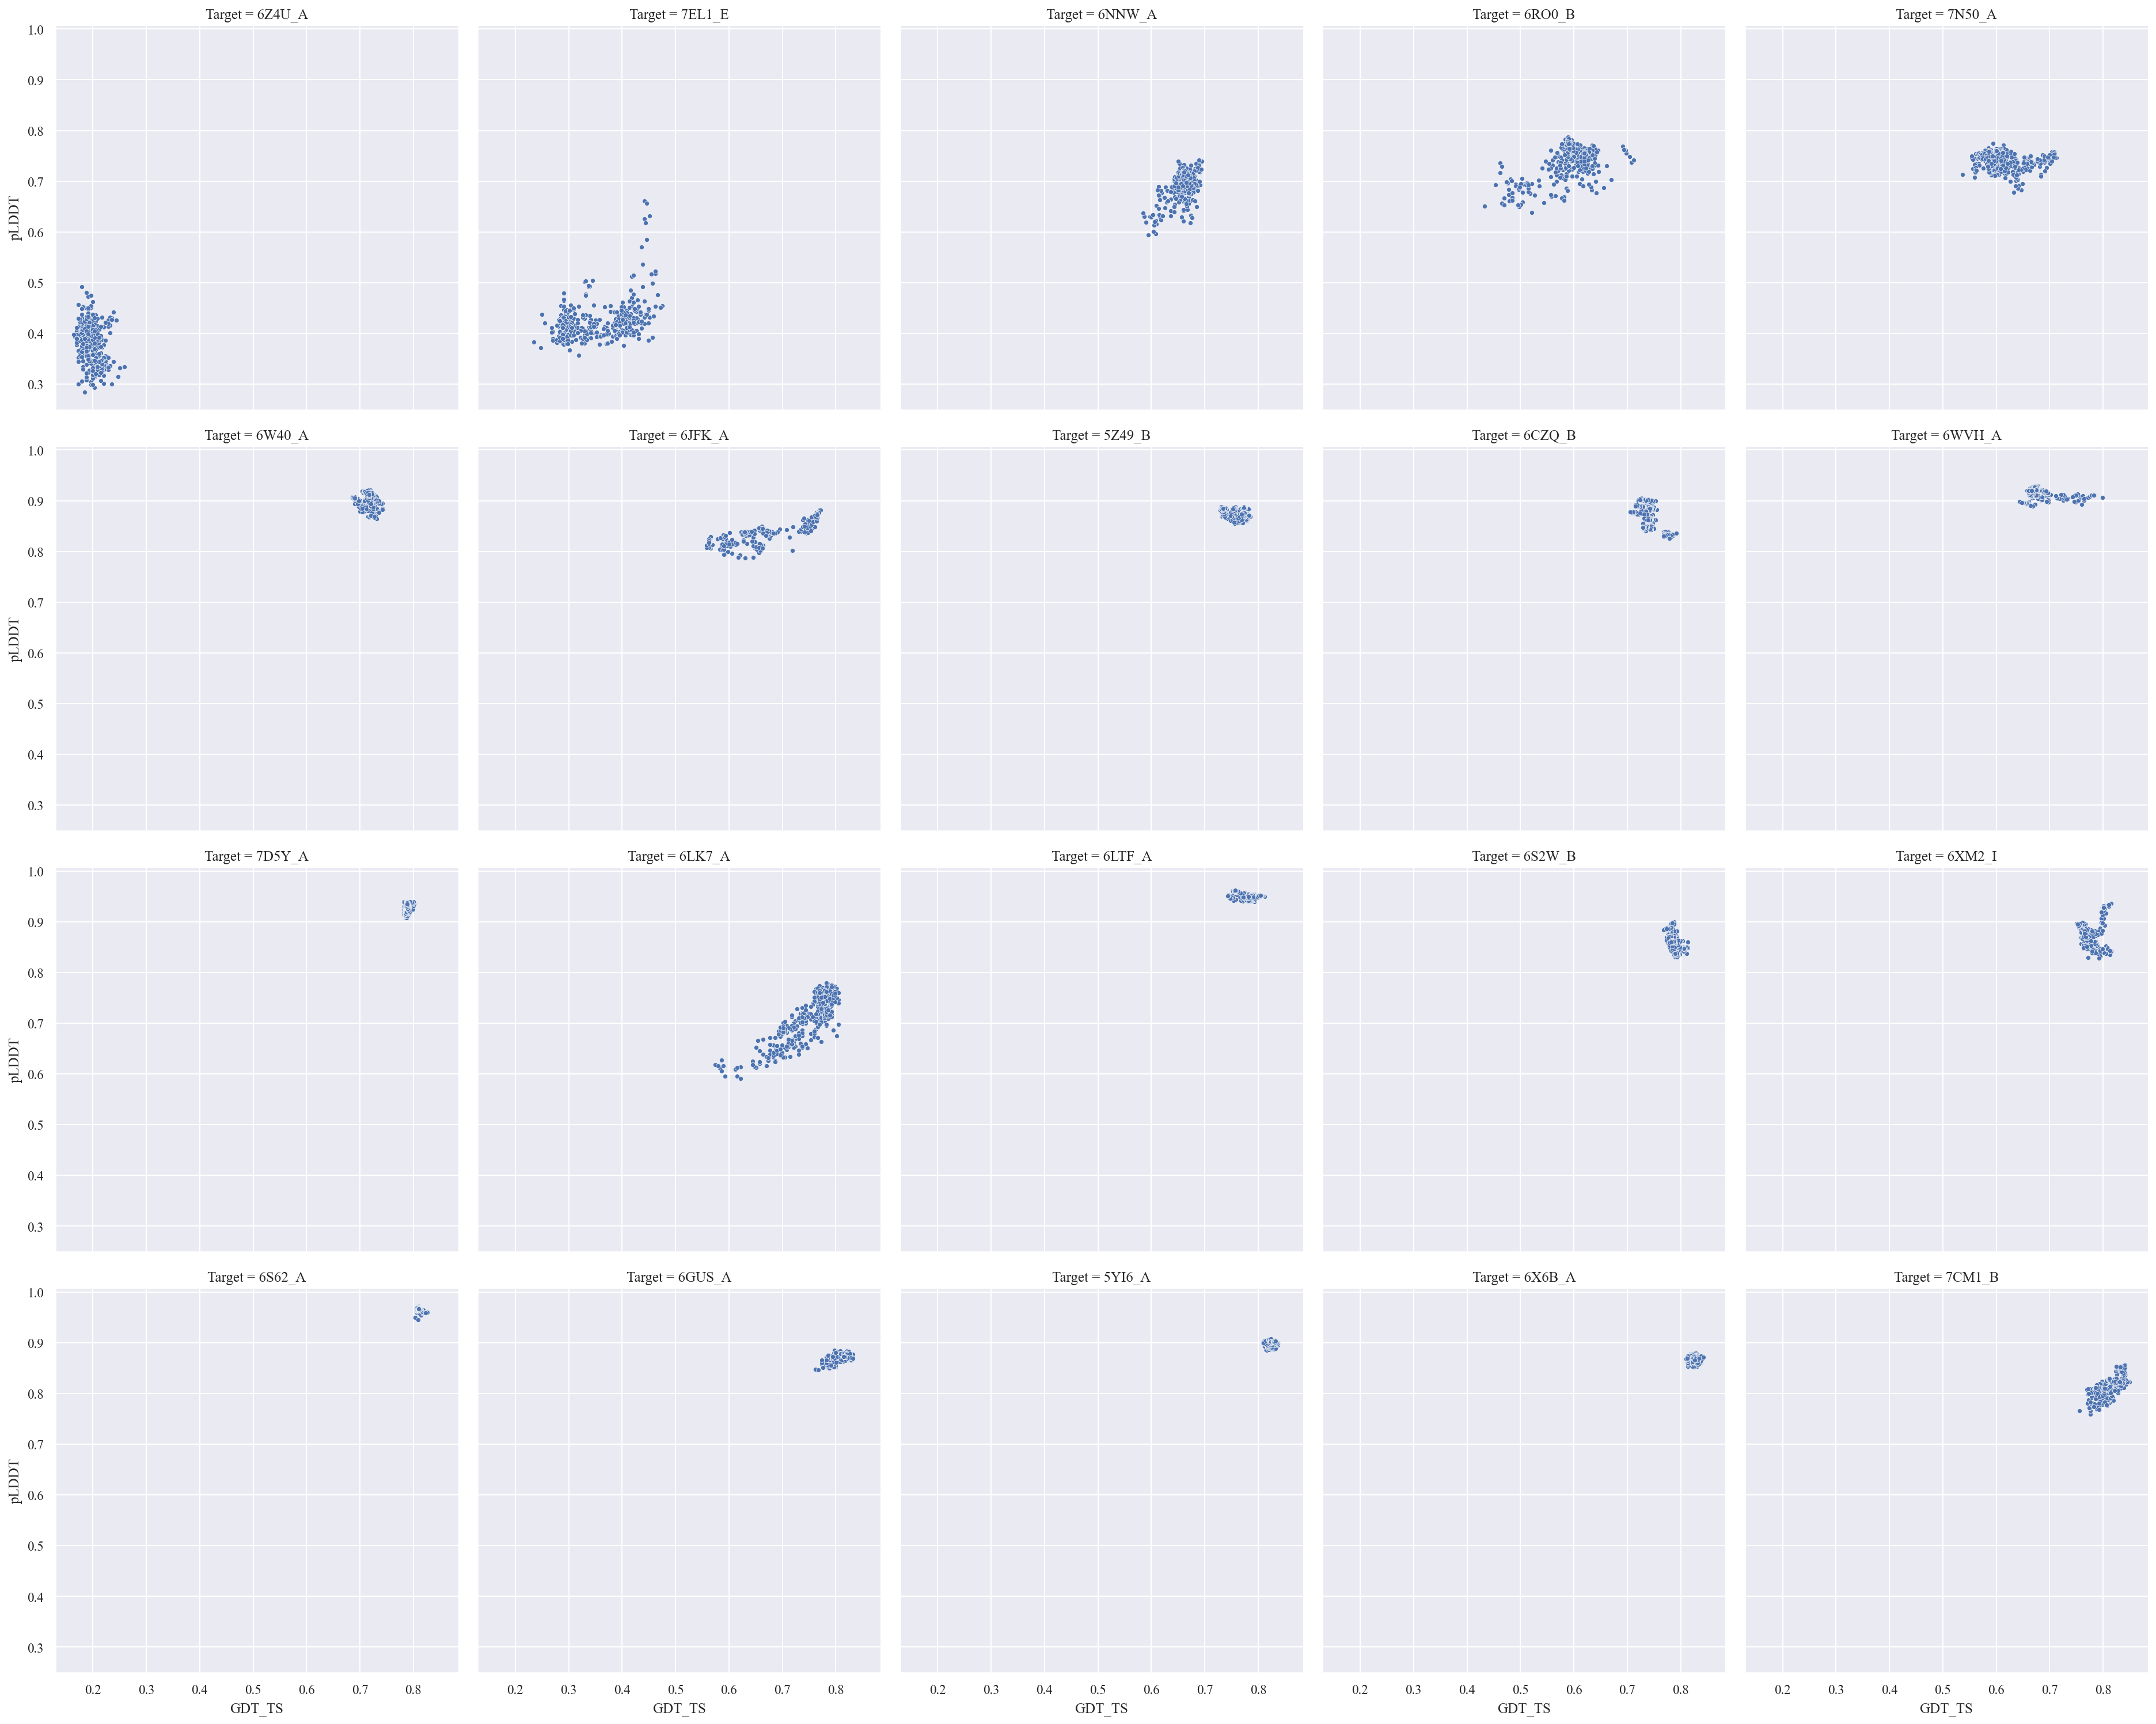

In [20]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets, s=15)

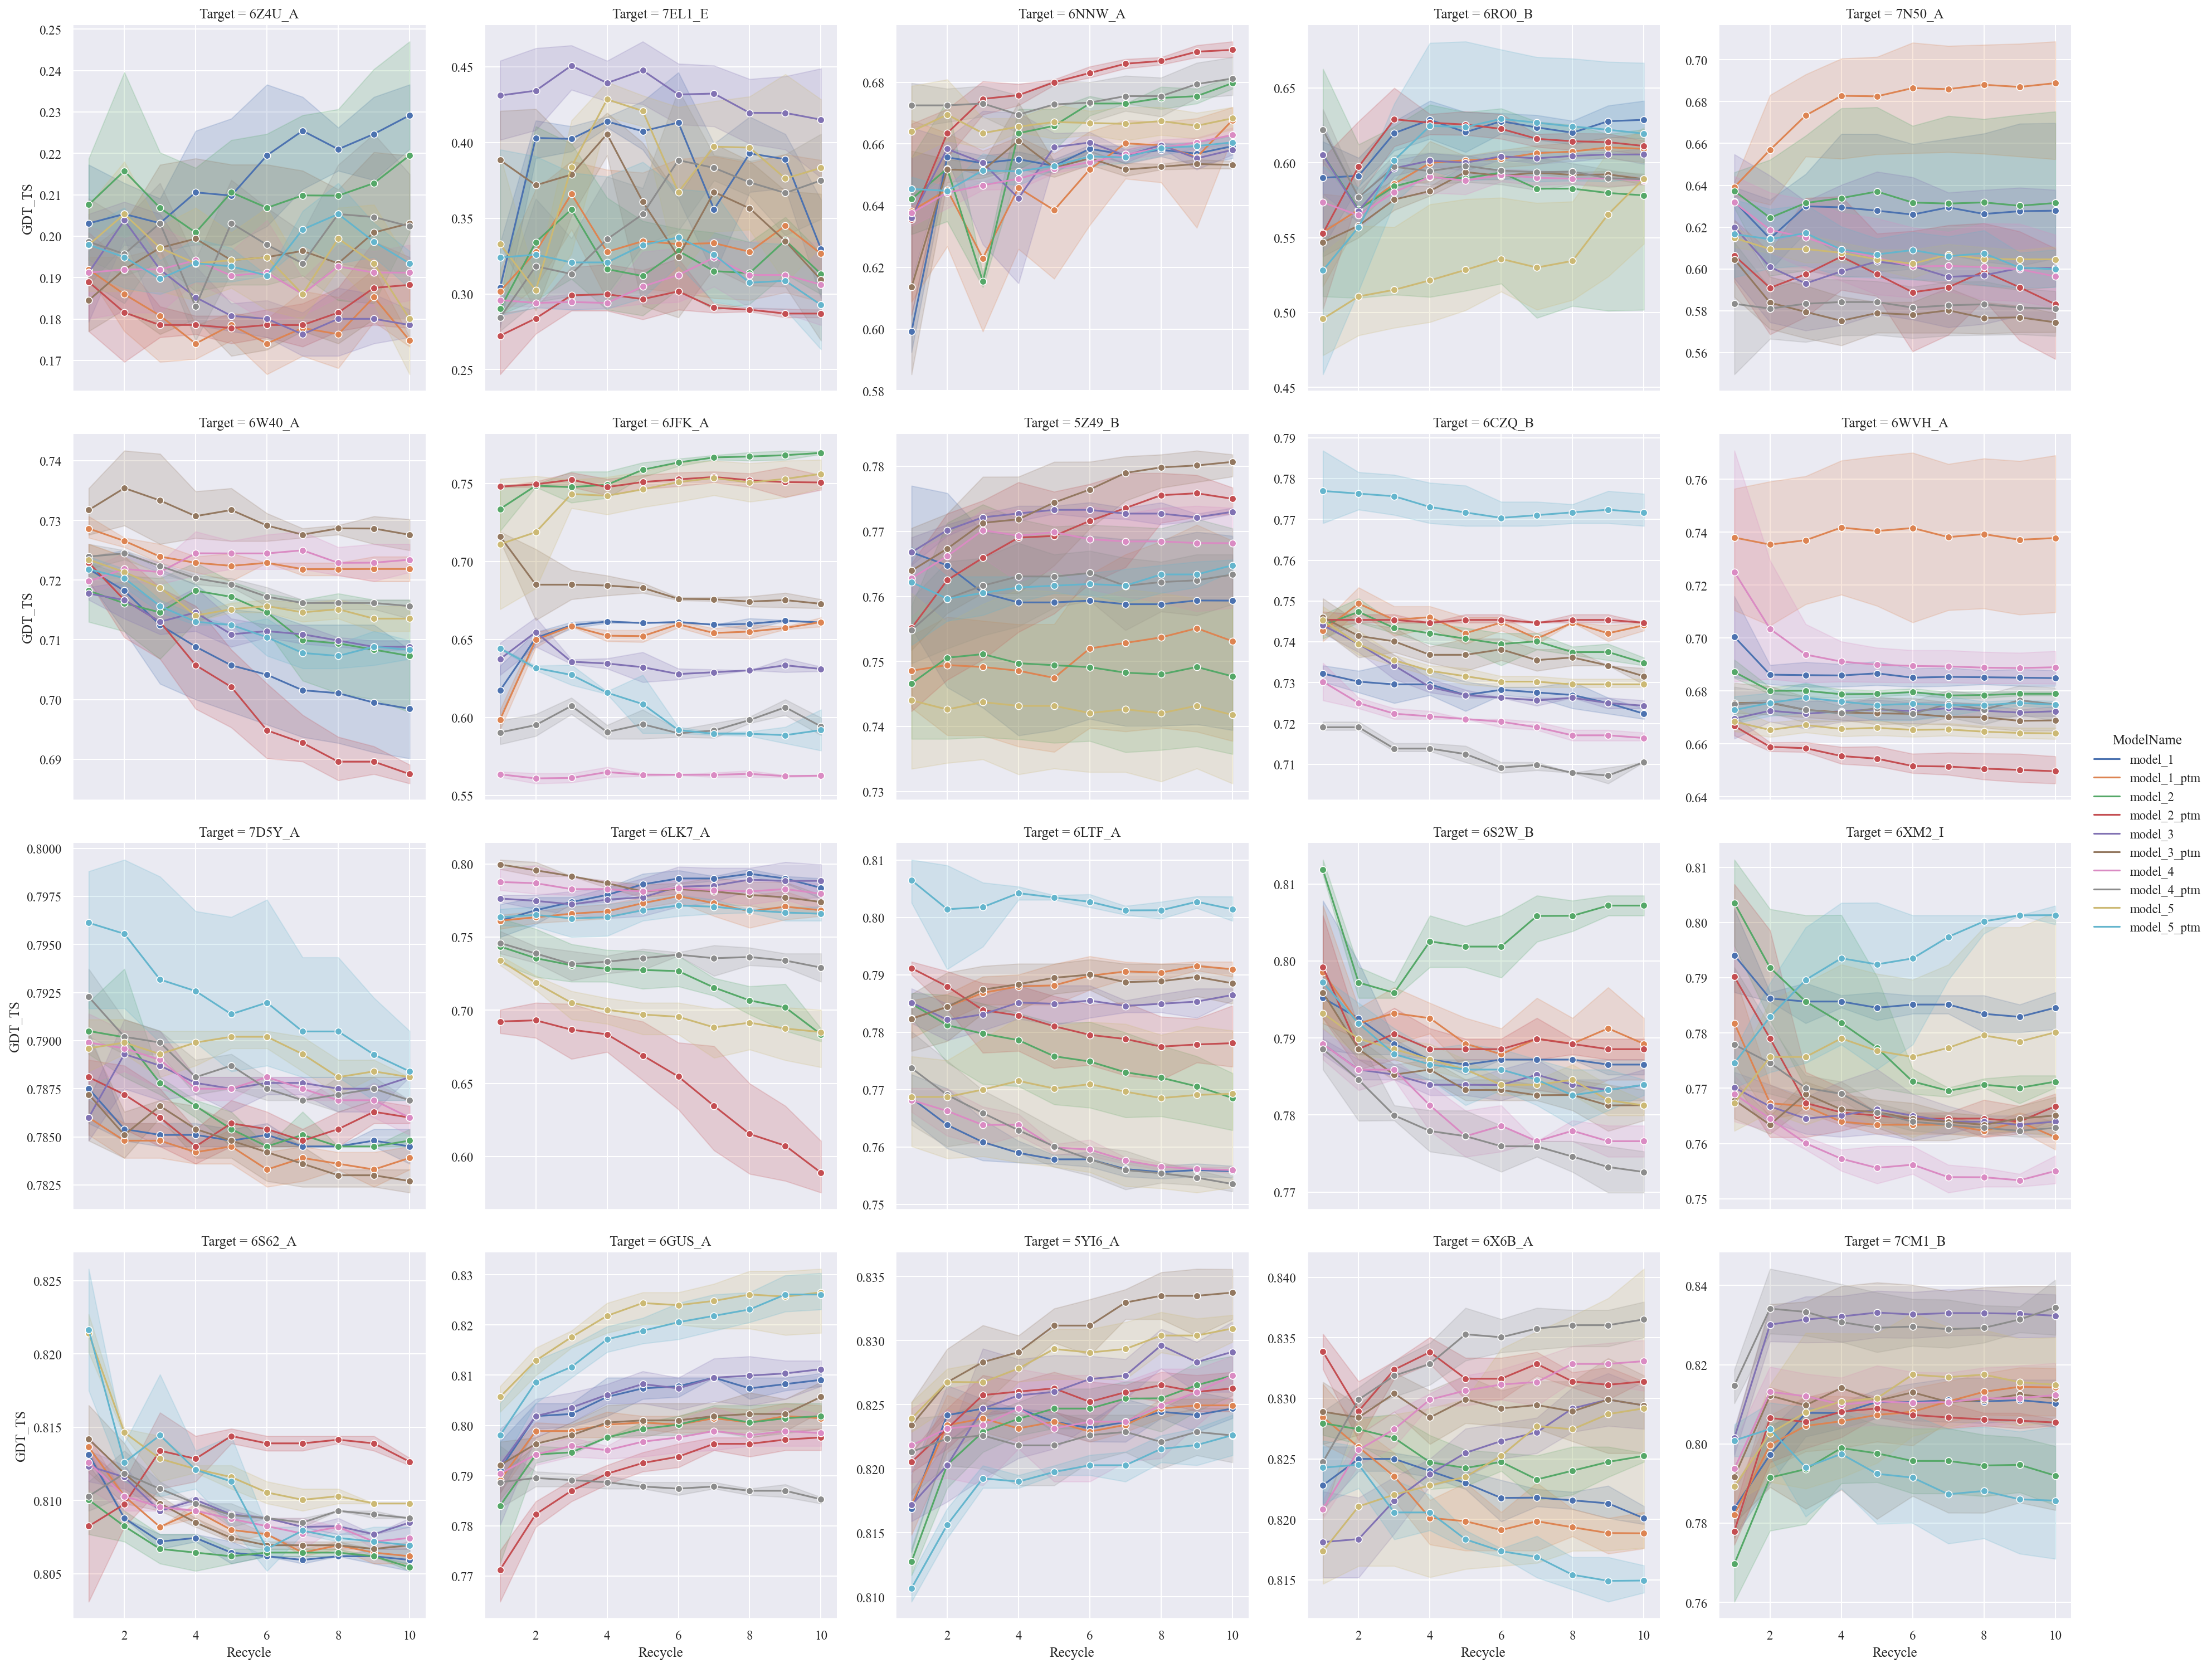

In [21]:
label = 'GDT_TS'
# For targets whose value difference between max and min is larger than threshold
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y=label,
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o',
            col='Target', col_wrap=5, col_order=sample_targets, facet_kws={'sharey': False, 'sharex': True})